# basic

In [1]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time

%matplotlib inline

## set up parameters

In [2]:
# load sample parameter
with open ('elecpy/temp/sim_params.json','r') as f:
    sim_params = json.load(f)

# modify parameters
sim_params['time']['end'] = 10
sim_params["stimulation"]["extracellular"][0]["start"] = 0.
sim_params["stimulation"]["extracellular"][0]["duration"] = 5.

print json.dumps(sim_params, indent=4)

{
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "stimulation": {
        "extracellular": [
            {
                "name": "point", 
                "interval": 100.0, 
                "start": 0.0, 
                "shape": [
                    200, 
                    200
                ], 
                "amplitude": 50.0, 
                "duration": 5.0, 
                "size": [
                    91, 
                    61, 
                    5
                ]
            }
        ], 
        "membrane": []
    }, 
    "cell_type": "mahajan", 
    "log": {
        "path": "result", 
        "cnt": 1000
    }, 
    "time": {
        "end": 10, 
        "udt": 0.001
    }
}


In [3]:
# set the parameters to the simulator
elp.sim_params = sim_params

## set up simulator

In [4]:
g = elp.sim_generator()

## run

In [15]:
out = []
while True:
    img = g.next()
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
elecpy done


StopIteration: 

## visualize

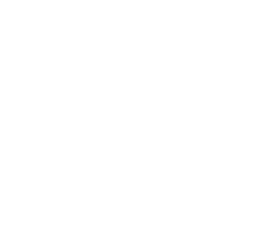

In [16]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(200,200),
        vmin = -100.0, vmax = 50.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())